# Remnant Parameter Estimation (SurfinBH)

In [1]:
import surfinBH
fit_name = 'NRSur3dq8Remnant'
fit = surfinBH.LoadFits(fit_name)

Loaded NRSur3dq8Remnant fit.


In [2]:
q = 1.24             # Mass ratio q>=1
chiA = [0,0,0]    # Spin of larger BH (z-direction only)
chiB = [0,0,0]    # Spin of smaller BH (z-direction only)

## Evaluate the fits and GPR error estimate.

# remnant mass and 1-sigma error estimate
mf, mf_err = fit.mf(q, chiA, chiB)

# remnant spin and 1-sigma error estimate
chif, chif_err = fit.chif(q, chiA, chiB)

# remnant recoil kick and 1-sigma error estimate
vf, vf_err = fit.vf(q, chiA, chiB)

# All of these together
mf, chif, vf, mf_err, chif_err, vf_err = fit.all(q, chiA, chiB)

In [3]:
# z-direction only
print(chif)
# mf is returning m2/m1...so multiply it by (m1+m2)
mf = mf*(36+29)
print(mf)

[0.         0.         0.68007186]
61.92344795441868


# IMRPhenomXPHM Time Domain Waveform

In [6]:
from pycbc.waveform import get_td_waveform
from pycbc.types import TimeSeries
import numpy as np

In [30]:
    hp, hc = get_td_waveform(approximant="IMRPhenomXPHM",
                             mass1=40,
                             mass2=40,
                             delta_t=1.0/16384,
                             f_lower=30,
                             distance=1e-14,
                             inclination=0)

    # sample times ---> timeseries
    hp_smp_ts = TimeSeries(hp.sample_times, delta_t=1/16384, epoch=0)
    # using crop on timeseries sample times - use cond for cropped sample times (aka ringdown analysis)
    cond = hp_smp_ts.crop(0.645,0)                                      

    # h+/hx data ---> timeseries
    hp_data = TimeSeries(hp, delta_t=1/16384, epoch=0)  
    # using crop on timeseries data (use cond_hp/hc for ringdown anaylsis)
    cond_hp = hp_data.crop(0.645,0)
    # turning into ndarray
    hp_signal = cond_hp.numpy()                  

    # repeat
    hc_data = TimeSeries(hc, delta_t=1/16384, epoch=0)              
    cond_hc = hc_data.crop(0.645,0)
    hc_signal = cond_hc.numpy()                                         

    # use for hp+hc ringdown analysis
    time = cond.numpy()              

In [31]:
import matplotlib.pyplot as plt

(array([-1.25e-04, -1.00e-04, -7.50e-05, -5.00e-05, -2.50e-05,  0.00e+00,
         2.50e-05,  5.00e-05,  7.50e-05,  1.00e-04,  1.25e-04]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

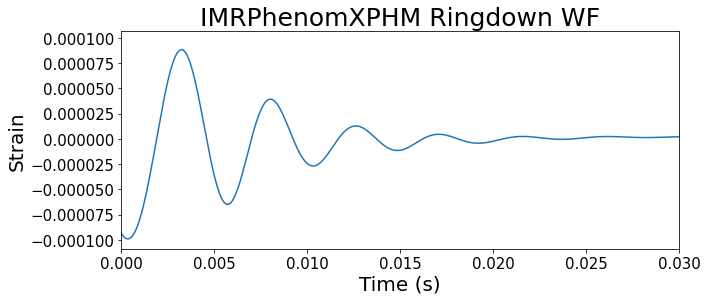

In [32]:
#plt.figure(figsize=pylab.figaspect(0.4))
plt.figure(figsize=(10,4))
plt.plot(cond, cond_hc, label='IMR XPHM Cross')
plt.xlim(0, 0.03)
plt.title('IMRPhenomXPHM Ringdown WF',fontsize=25)
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Strain',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [33]:
import ringdown.qnms

In [34]:
def rngdwn(time,M,chi,l,m,n,amplitude,phi):
    # using get_ftau to retrieve frequency and damping time for given values (ftau = [freq, tau])
    ftau = ringdown.qnms.get_ftau(M,chi,n,l,m)
    gamma = (ftau[1])**-1
    t0=0
        
    wf_kws = dict(
    A = amplitude,
    phi = phi,
    f = ftau[0],                                                            
    gamma = gamma,                                                          
    )
        
    def get_signal(time, A, phi, f, gamma):
        # generate sinusoid
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)
    
    return signal

In [35]:
def two_two_zero(time,M,chi,a220,phi220):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,0,2,2)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a220,
    phi = phi220,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def two_two_one(time,M,chi,a221,phi221):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,1,2,2)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a221,
    phi = phi221,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def two_two_two(time,M,chi,a222,phi222):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,2,2,2)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a222,
    phi = phi222,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def two_one_zero(time,M,chi,a210,phi210):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,0,2,1)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a210,
    phi = phi210,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def two_one_one(time,M,chi,a211,phi211):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,1,2,1)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a211,
    phi = phi211,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def two_one_two(time,M,chi,a212,phi212):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,2,2,1)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a212,
    phi = phi212,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def three_two_zero(time,M,chi,a320,phi320):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,0,3,2)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a320,
    phi = phi320,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def three_two_one(time,M,chi,a321,phi321):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,1,3,2)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a321,
    phi = phi321,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def three_two_two(time,M,chi,a322,phi322):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,2,3,2)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a322,
    phi = phi322,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def three_three_zero(time,M,chi,a330,phi330):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,0,3,3)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a330,
    phi = phi330,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def three_three_one(time,M,chi,a331,phi331):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,1,3,3)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a331,
    phi = phi331,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def three_three_two(time,M,chi,a332,phi332):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,2,3,3)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a332,
    phi = phi332,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def four_four_zero(time,M,chi,a440,phi440):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,0,4,4)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a440,
    phi = phi440,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def four_four_one(time,M,chi,a441,phi441):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,1,4,4)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a441,
    phi = phi441,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def four_four_two(time,M,chi,a442,phi442):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,2,4,4)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a442,
    phi = phi442,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal

In [36]:
import makefun

In [37]:
# define what modes to use
def rd_fun(modes=[(2,2,0),(2,2,1)]):
    #create function signature
    func_signature="rngdwn_multi_modes(time,M,chi"
    # loop through defined modes
    for mode in modes:
        l,m,n = mode
        func_signature+= f",a{l}{m}{n},phi{l}{m}{n}"
    func_signature+=")"
    # kwargs = a220, phi220, a221, phi221, ...
    def new_fun(time,M,chi,**kwargs):
        # creating empty time array to hold rngdwn() return
        ex = np.zeros(time.shape)
        # loop through defined modes
        for mode in modes:
            l,m,n=mode
            amplitude=kwargs[f"a{l}{m}{n}"]
            phi=kwargs[f"phi{l}{m}{n}"]
            # add back to empty time array  
            ex += rngdwn(time,M,chi,l,m,n,amplitude,phi)
            #print(time,M,chi,kwargs)
        # return ex to have combined signal for all defined modes
        return ex
    # this fx now looks like what scipy.curve_fit expects...
    return makefun.create_function(func_signature,new_fun)

# let "test = rd_fun" // test now takes inputs of (time,M,chi,a220,phi220,a221,phi221) --> curve_fit can play with
test = rd_fun(modes=[(2,1,0),(2,1,1),(2,1,2),(2,2,0),(2,2,1),(2,2,2),(3,2,0),(3,2,1),(3,2,2),(3,3,0),(3,3,1),(3,3,2),(4,4,0),(4,4,1),(4,4,2)]
             )

# scipy.curve_fit

In [39]:
from scipy.optimize import curve_fit
import numpy as np


# making large bound arrays
gb = np.array([1e-4, np.pi])
guess_bounds = np.tile(gb, 15)
m_chi = [80,0.6]
con = np.concatenate((m_chi, guess_bounds))

lower = np.array([1e-10, 0])
lower_bound = np.tile(lower, 15)
m_chi_lower = [50,0.3]
con_lower = np.concatenate((m_chi_lower,lower_bound))

upper = np.array([1e-3, 2*np.pi])
upper_bound = np.tile(upper, 15)
m_chi_upper = [95, 0.85]
con_upper = np.concatenate((m_chi_upper, upper_bound))

In [40]:
# xdata is time from IMR cell ^^^
xdata = time
# ydata is data from IMR cell ^^^
ydata = cond_hc
# p0 is my initial guesses
p0 = con
#using curve_fit
popt,pcov = curve_fit(test,xdata,ydata,p0,bounds=(con_lower,con_upper))


94.89568432608382 0.544138373766112 0.00013447353336901844 4.9225688297945 0.0007960042717632173 2.0661350004824652 0.0007586894854827985 0.000839154858893123 7.453572083681254e-05 1.831016001780835e-05 0.000938540142733894 3.7434871171949995 0.00025095589534812764 0.00039503218480010135 7.004847289935031e-05 6.28318530717887 0.00026241012373617433 1.3658659834915339 1.1311053287104535e-10 2.1370115783285124 5.7174662205780145e-05 4.512742151934529 2.1852980363043366e-07 1.801748513636056e-08 2.3308698933369433e-10 2.447844806663685 1.9514223436870737e-05 2.43410891272726 0.00020497425217843487 5.415682677685496 0.0002698984733019842 2.8959353068026954


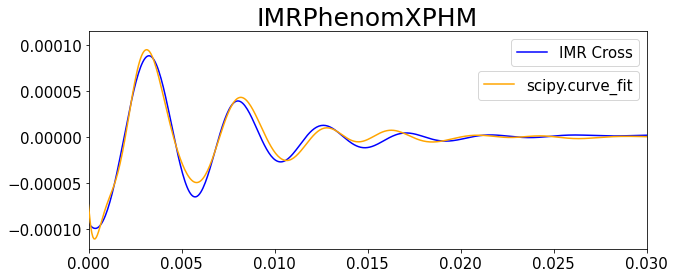

In [41]:
print(*popt)
fig1, ax1 = plt.subplots(figsize=(10,4))
ax2 = ax1.twiny()
ax1.set_xlim(0,.03)
ax2.set_xlim(0,.03)
ax2.set_frame_on(False)             
ax2.get_xaxis().tick_bottom()           
ax2.axes.get_xaxis().set_visible(False)
ax1.tick_params(axis='both',labelsize=15)
ax2.tick_params(axis='both',labelsize=15)

ax1.plot(cond, cond_hc, label='IMR Cross',c='blue')
ax2.plot(xdata, test(xdata, *popt),label='scipy.curve_fit',c='orange')
ax1.set_title('IMRPhenomXPHM',fontsize=25)
ax1.legend(bbox_to_anchor=(1, 1),loc='upper right',fontsize=15)
ax2.legend(bbox_to_anchor=(1, .85),loc='upper right',fontsize=15)

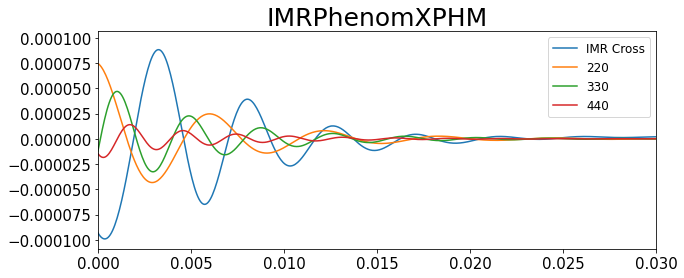

In [42]:
a = two_one_zero(time,popt[0], popt[1], popt[2] , popt[3])
b = two_one_one(time,popt[0], popt[1], popt[4] , popt[5])
c = two_one_two(time,popt[0], popt[1], popt[6] , popt[7])
d = two_two_zero(time,popt[0], popt[1], popt[8] , popt[9])
e = two_two_one(time,popt[0], popt[1], popt[10] , popt[11])
f = two_two_two(time,popt[0], popt[1], popt[12] , popt[13])
g = three_two_zero(time,popt[0], popt[1], popt[14] , popt[15])
h = three_two_one(time,popt[0], popt[1], popt[16] , popt[17])
i = three_two_two(time,popt[0], popt[1], popt[18] , popt[19])
j = three_three_zero(time,popt[0], popt[1], popt[20] , popt[21])
k = three_three_one(time,popt[0], popt[1], popt[22] , popt[23])
l = three_three_two(time,popt[0], popt[1], popt[24] , popt[25])
m = four_four_zero(time,popt[0], popt[1], popt[26] , popt[27])
n = four_four_one(time,popt[0], popt[1], popt[28] , popt[29])
o = four_four_two(time,popt[0], popt[1], popt[30] , popt[31])
plt.figure(figsize=(10,4))
plt.plot(cond, cond_hc, label='IMR Cross')
#plt.plot(a,label='210')
#plt.plot(b,label='211')
#plt.plot(c,label='212')
plt.plot(d,label='220')
#plt.plot(e,label='221')
#plt.plot(f,label='222')
#plt.plot(g,label='320')
#plt.plot(h,label='321')
#plt.plot(i,label='322')
plt.plot(j,label='330')
#plt.plot(k,label='331')
#plt.plot(l,label='332')
plt.plot(m,label='440')
#plt.plot(n,label='441')
#plt.plot(o,label='442')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('IMRPhenomXPHM',fontsize=25)
plt.xlim(0,.03)
plt.legend(loc='upper right',fontsize=12)
plt.savefig('XPHM_fundamentals',bbox_inches='tight')

In [57]:
def plot_ringdown(x0,xdata,ydata,p0,bounds):              
    
    popt,pcov = curve_fit(x0,xdata,ydata,p0,bounds=bounds)

    fig1, ax1 = plt.subplots(figsize=(10,4))
    ax2 = ax1.twiny()
    ax1.set_xlim(0,.03)
    ax2.set_xlim(0,.03)
    ax2.set_frame_on(False)             
    ax2.get_xaxis().tick_bottom()           
    ax2.axes.get_xaxis().set_visible(False)
    ax1.tick_params(axis='both',labelsize=15)
    ax2.tick_params(axis='both',labelsize=15)

    ax1.plot(xdata, ydata, label='IMR Plus',c='blue')
    ax2.plot(xdata, test(xdata, *popt),label='scipy.curve_fit',c='orange')
    ax1.set_title('IMRPhenomXPHM',fontsize=25)
    ax1.legend(bbox_to_anchor=(1, 1),loc='upper right',fontsize=15)
    ax2.legend(bbox_to_anchor=(1, .85),loc='upper right',fontsize=15)

In [58]:
# making large bound arrays
gb = np.array([1e-4, np.pi])
guess_bounds = np.tile(gb, 15)
m_chi = [62,0.68]
con = np.concatenate((m_chi, guess_bounds))

lower = np.array([1e-10, 0])
lower_bound = np.tile(lower, 15)
m_chi_lower = [50,0.3]
con_lower = np.concatenate((m_chi_lower,lower_bound))

upper = np.array([1e-3, 2*np.pi])
upper_bound = np.tile(upper, 15)
m_chi_upper = [95, 0.85]
con_upper = np.concatenate((m_chi_upper, upper_bound))

#print(con_lower)
#print(con_upper)

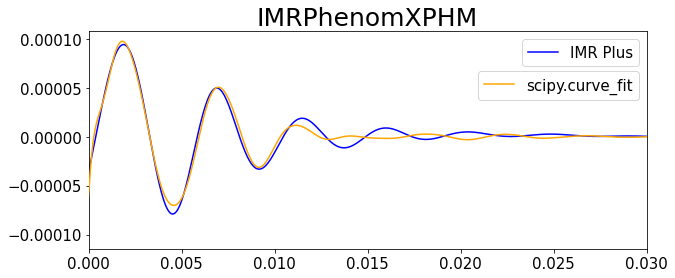

In [59]:
x0 = test
xdata = time
ydata = cond_hp
p0 = con
bounds = (con_lower, con_upper)
plot_ringdown(x0,xdata,ydata,p0,bounds)

In [64]:
def XPHMringdown_plots(mass1,mass2,spin1x,spin1y,spin1z,spin2x,spin2y,spin2z,x0,p0,bounds):
    inclination = [0, np.pi/6, np.pi/3, np.pi/2]
    for i in inclination:        
        hp, hc = get_td_waveform(approximant="IMRPhenomXPHM",
                                 mass1=mass1,
                                 mass2=mass2,
                                 delta_t=1.0/16384,
                                 f_lower=30,
                                 distance=1e-14,
                                 inclination=i,
                                 spin1x=spin1x,
                                 spin1y=spin1y,
                                 spin1z=spin1z,
                                 spin2x=spin2x,
                                 spin2y=spin2y,
                                 spin2z=spin2z)

        # sample times ---> timeseries
        hp_smp_ts = TimeSeries(hp.sample_times, delta_t=1/16384, epoch=0)
        cond = hp_smp_ts.crop(0.645,0)                                      

        # h+/hx data ---> timeseries
        hp_data = TimeSeries(hp, delta_t=1/16384, epoch=0)  
        cond_hp = hp_data.crop(0.645,0)
        hp_signal = cond_hp.numpy()                  

        # repeat
        hc_data = TimeSeries(hc, delta_t=1/16384, epoch=0)              
        cond_hc = hc_data.crop(0.645,0)
        hc_signal = cond_hc.numpy()                                         

        # use for hp+hc ringdown analysis
        time = cond.numpy()             
        
        '''plt.figure(figsize=(10,4))
        plt.plot(cond, cond_hp, label='IMR XPHM Cross')
        plt.xlim(0, 0.03)
        plt.title('IMRPhenomXPHM Ringdown WF',fontsize=25)
        plt.xlabel('Time (s)',fontsize=20)
        plt.ylabel('Strain',fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)'''
        
        x0 = x0
        xdata = time
        ydata = cond_hp
        p0 = p0
        bounds = bounds
        plot_ringdown(x0,xdata,ydata,p0,bounds)

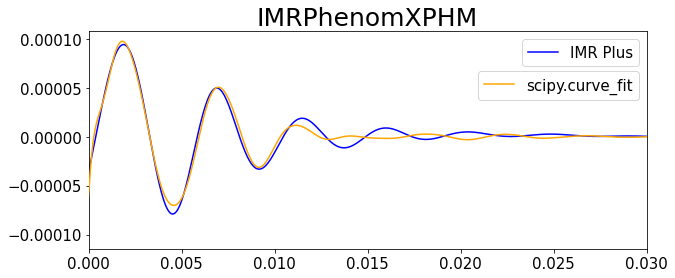

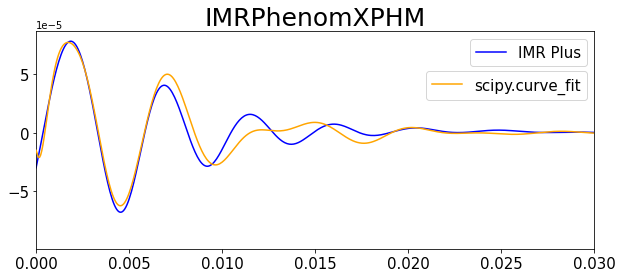

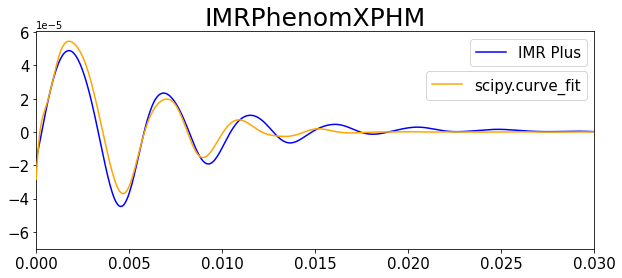

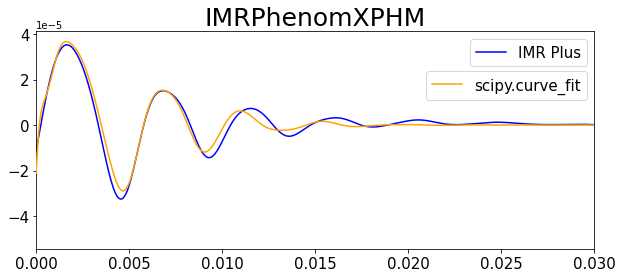

In [65]:
XPHMringdown_plots(40,40,0,0,0,0,0,0,test,con,bounds)

In [ ]:
XPHMringdown_plots(40,40,0,0,0.5,0,0,0.5,test,con,bounds)

In [ ]:
XPHMringdown_plots(40,40,0.5,0.5,0.5,0.5,0.5,0.5,test,con,bounds)

In [ ]:
XPHMringdown_plots(40,40,0,0,-0.5,0,0,-0.5,test,con,bounds)

In [ ]:
XPHMringdown_plots(40,20,0,0,0,0,0,0,test,con,bounds)